# What's cooking

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [3]:
def plot_confusion_matrix(X_test, y_test, clf):
    conf_df = pd.DataFrame(confusion_matrix(y_test, clf.predict(X_test)), index=LE.classes_, columns=LE.classes_)
    sns.heatmap(conf_df, annot=True, fmt='d', vmin=0, vmax=100)

## Read data

In [4]:
df = pd.read_json('data/train.json')
df.set_index('id', inplace=True)

In [5]:
df.head()

,cuisine,ingredients
id,,
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


### Create features

In [6]:
mlb = MultiLabelBinarizer(sparse_output=True)

X_mlb = mlb.fit_transform(df['ingredients'])
sdf = pd.SparseDataFrame(X_mlb, index=df.index, columns=mlb.classes_)
sdf['cuisine'] = df['cuisine']

In [7]:
vectorizer = TfidfVectorizer()
df['ingredients_joined'] = df['ingredients'].apply(lambda l: ', '.join(l))
X = vectorizer.fit_transform(df['ingredients_joined'])

In [8]:
sdf.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms,cuisine
id,,,,,,,,,,,,,,,,,,,,,
10259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,greek
25693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,southern_us
20130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,filipino
22213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,indian
13162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,indian


In [9]:
LE = LabelEncoder()
Y = LE.fit_transform(df['cuisine'])

## Analiz

In [10]:
ingredients = set()
for _, row in df.iterrows():
    ingredients |= set(row['ingredients'])

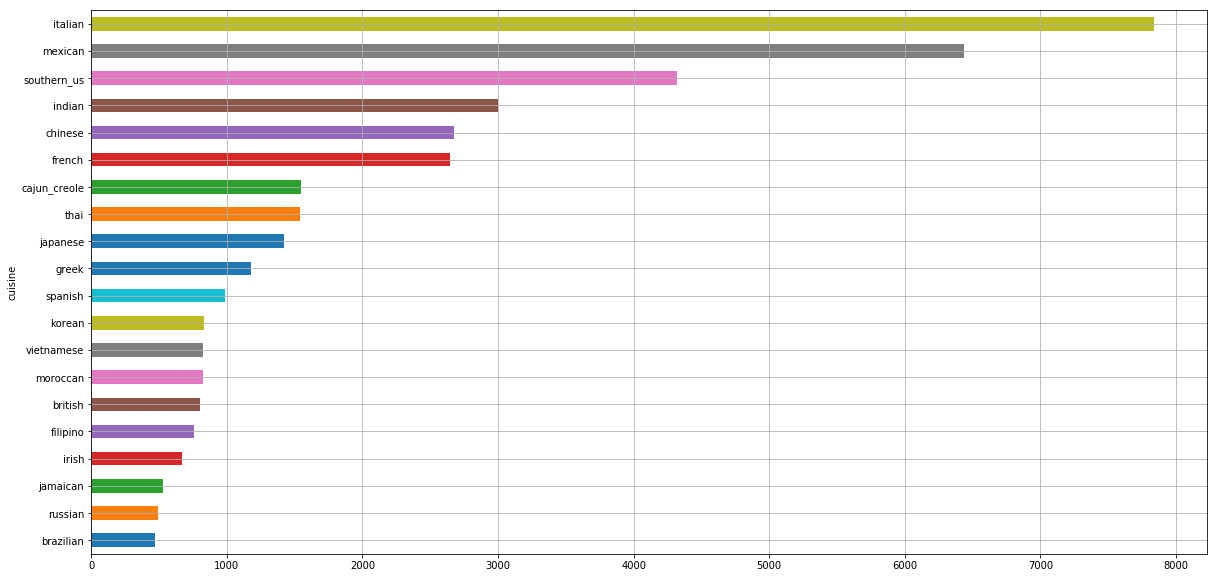

In [11]:
sdf.groupby(by='cuisine').size().sort_values().plot.barh(grid=True)

In [12]:
df['count_ingredients'] = df['ingredients'].apply(lambda l: len(l))

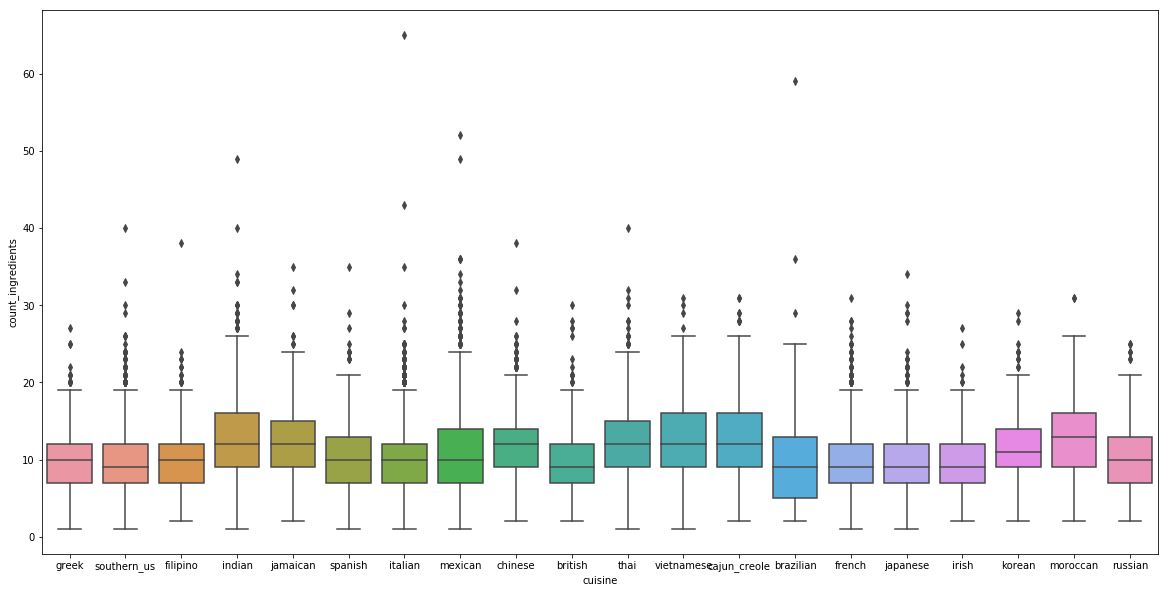

In [13]:
sns.boxplot(data=df, x='cuisine', y='count_ingredients')

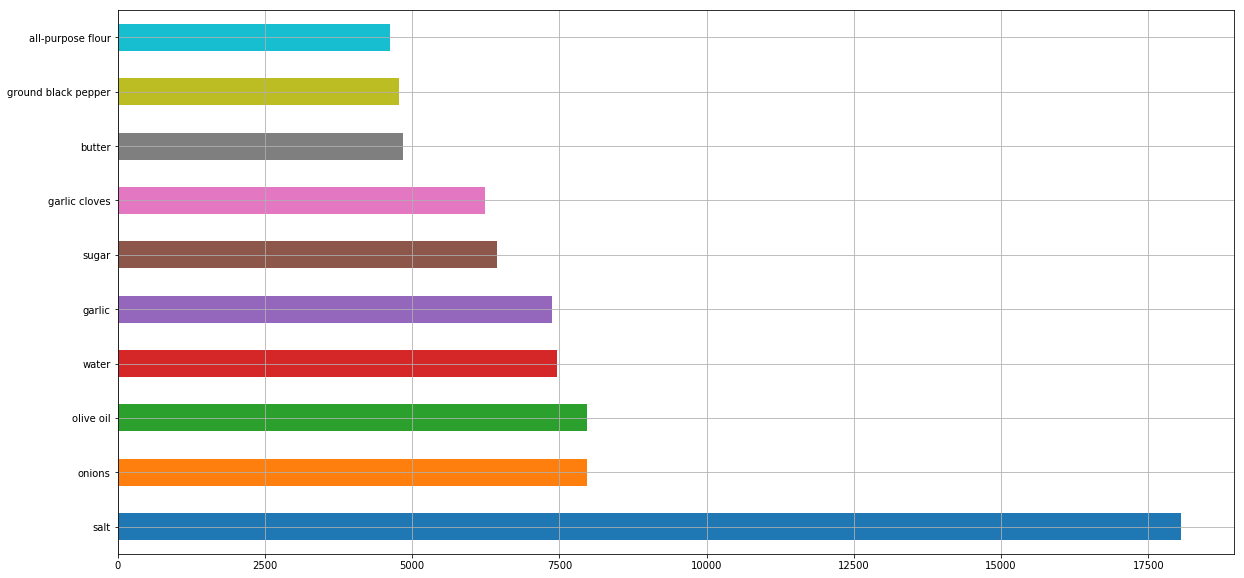

In [14]:
top_10_ingredients = sdf.drop(columns='cuisine').sum(axis=0).sort_values(ascending=False)[:10]
top_10_ingredients.plot.barh(grid=True)

In [ ]:
sdf[top_10_ingredients.index.tolist()+['cuisine']].groupby(by='cuisine').sum().plot.bar()

## Learning

### LogReg

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
clf = LinearSVC(C=10, random_state=42)

In [ ]:
# params = {'class_weight': [None, 'balanced'],
#           'penalty': ['l1', 'l2'],
#           'C': [0.5, 1.0, 2.0]}

# lg = LogisticRegression(random_state=42)
# clf = GridSearchCV(lg, param_grid=params, cv=4, n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

In [ ]:
plot_confusion_matrix(X_test, y_test, clf)

## Prediction

In [ ]:
df_test = pd.read_json('data/test.json')
df_test.set_index('id', inplace=True)

In [ ]:
df_test.shape

In [ ]:
df_test.head()

In [ ]:
for index, row in df_test.iterrows():
    new_ingredients = set(row['ingredients']) & ingredients
    df_test.loc[index, 'ingredients'] = list(new_ingredients)

In [ ]:
df_test['ingredients_joined'] = df_test['ingredients'].apply(lambda l: ', '.join(l))

In [ ]:
X_control = vectorizer.transform(df_test['ingredients_joined'])

In [ ]:
X_control.shape

In [ ]:
Y_predict = clf.predict(X_control)

In [ ]:
Y_predict

In [ ]:
df_predict = pd.DataFrame(le.inverse_transform(Y_predict), index=df_test.index, columns=['cuisine'])

In [ ]:
df_predict.head()

In [ ]:
df_predict.to_csv('data/predict.csv')